In [1]:
import numpy as np
import pandas as pd
from tqdm.autonotebook import tqdm
import matplotlib.pyplot as plt

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_completeness_v_measure

In [3]:
from tfumap.paths import ensure_dir, MODEL_DIR, DATA_DIR

In [4]:
metrics_df = pd.concat([pd.read_pickle(i) for i in list((DATA_DIR / 'clustering_metric_df').glob('*.pickle'))])
metrics_df[:3]

,dataset,class_,dim,silhouette,homogeneity,completeness,v_measure,init_,n_clusters,model
0,mnist,PCA,2,0.377440,0.272552,0.39746,0.323363,0,5,"KMeans(n_clusters=5, random_state=0)"
1,mnist,PCA,2,0.377355,0.273045,0.39793,0.323865,1,5,"KMeans(n_clusters=5, random_state=1)"
2,mnist,PCA,2,0.377199,0.273357,0.39823,0.324184,2,5,"KMeans(n_clusters=5, random_state=2)"


In [5]:
import seaborn as sns

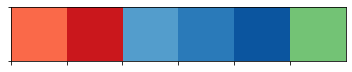

In [6]:
palette = sns.color_palette('Reds', 3)[1:] + sns.color_palette('Blues', 6)[3:] + sns.color_palette('Greens', 1) 
sns.palplot(palette)

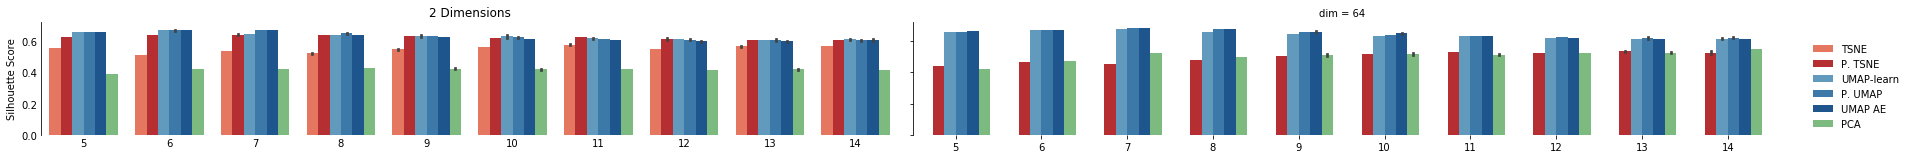

In [7]:
fg = sns.catplot(
    x="n_clusters",
    y="v_measure",
    hue="class_",
    hue_order=["TSNE", "parametric-tsne", "umap-learn",  "network", "autoencoder", "PCA"],
    #order = ['mnist', 'fmnist', 'macosko2015', 'cassins_dtw', 'cifar10'],
    col="dim",
    height=2.5, 
    aspect=5,
    data=metrics_df[metrics_df.dataset == 'fmnist'],
    kind="bar",
    palette=palette,
    #legend=False
)
(fg.despine(bottom=True)
 #.set_xticklabels(['MNIST', 'FMNIST', 'Retina', 'Cassin\'s', 'CIFAR10'])
 .set_axis_labels("", "Silhouette Score")
)
ax = fg.axes[0][0]
ax.tick_params(axis=u'both', which=u'both',length=0)
fg._legend._legend_title_box._text.set_text("")

ax.set_title('2 Dimensions')



fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'umap-learn'))[0][0]].set_text('UMAP-learn')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'network'))[0][0]].set_text('P. UMAP')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'autoencoder'))[0][0]].set_text('UMAP AE')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'parametric-tsne'))[0][0]].set_text('P. TSNE')

#save_fig(FIGURE_DIR/'silhouette-test', save_pdf=True, dpi=300)

In [8]:
metrics_df[:3]

,dataset,class_,dim,silhouette,homogeneity,completeness,v_measure,init_,n_clusters,model
0,mnist,PCA,2,0.377440,0.272552,0.39746,0.323363,0,5,"KMeans(n_clusters=5, random_state=0)"
1,mnist,PCA,2,0.377355,0.273045,0.39793,0.323865,1,5,"KMeans(n_clusters=5, random_state=1)"
2,mnist,PCA,2,0.377199,0.273357,0.39823,0.324184,2,5,"KMeans(n_clusters=5, random_state=2)"


### plot on the basis of the best silhouette score

In [9]:
### get the best silhouette score for each dataset, class_, dim_
metrics_df_max_iter = []
for dataset in metrics_df.dataset.unique():
    for class_ in metrics_df.class_.unique():
        for dim in metrics_df.dim.unique():
            subset_df = metrics_df[
                (dataset == metrics_df.dataset.values) &
                (class_ == metrics_df.class_.values) &
                (dim == metrics_df.dim.values) 
            ]
            if len(subset_df) > 0:
                #print(np.argmax(subset_df.silhouette))
                metrics_df_max_iter.append(subset_df.iloc[np.argmax(subset_df.silhouette)])

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


In [10]:
metrics_max_df = pd.concat(metrics_df_max_iter, axis=1).T.reset_index()
metrics_max_df[:3]

,index,dataset,class_,dim,silhouette,homogeneity,completeness,v_measure,init_,n_clusters,model
0,0,mnist,PCA,2,0.37744,0.272552,0.39746,0.323363,0,5,"KMeans(n_clusters=5, random_state=0)"
1,18,mnist,PCA,64,0.0912846,0.472775,0.53284,0.501013,3,8,KMeans(random_state=3)
2,28,mnist,autoencoder,2,0.529301,0.837299,0.85496,0.846037,3,10,"KMeans(n_clusters=10, random_state=3)"


In [11]:
metrics_max_df

,index,dataset,class_,dim,silhouette,homogeneity,completeness,v_measure,init_,n_clusters,model
0,0,mnist,PCA,2,0.37744,0.272552,0.39746,0.323363,0,5,"KMeans(n_clusters=5, random_state=0)"
1,18,mnist,PCA,64,0.0912846,0.472775,0.53284,0.501013,3,8,KMeans(random_state=3)
2,28,mnist,autoencoder,2,0.529301,0.837299,0.85496,0.846037,3,10,"KMeans(n_clusters=10, random_state=3)"
3,23,mnist,autoencoder,64,0.586339,0.84531,0.896477,0.870142,3,9,"KMeans(n_clusters=9, random_state=3)"
4,29,mnist,direct,2,0.617412,0.841485,0.861186,0.851221,4,10,"KMeans(n_clusters=10, random_state=4)"
...,...,...,...,...,...,...,...,...,...,...,...
60,33,macosko2015,umap-learn,2,0.503299,0.78593,0.424224,0.551021,3,12,"KMeans(n_clusters=12, random_state=3)"
61,4,macosko2015,umap-learn,64,0.640607,0.76894,0.783878,0.776338,4,6,"KMeans(n_clusters=6, random_state=4)"
62,21,macosko2015,TSNE,2,0.402322,0.749659,0.389235,0.512415,1,10,"KMeans(n_clusters=10, random_state=1)"
63,16,macosko2015,parametric-tsne,2,0.505702,0.782231,0.475215,0.591243,1,9,"KMeans(n_clusters=9, random_state=1)"


In [22]:
from tfumap.paths import FIGURE_DIR, save_fig

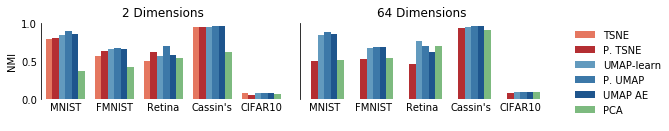

In [24]:
fg = sns.catplot(
    x="dataset",
    y="v_measure",
    hue="class_",
    hue_order=["TSNE", "parametric-tsne", "umap-learn",  "network", "autoencoder", "PCA"],
    order = ['mnist', 'fmnist', 'macosko2015', 'cassins_dtw', 'cifar10'],
    col="dim",
    height=2, 
    aspect=2.0,
    data=metrics_max_df,
    kind="bar",
    palette=palette,
    #legend=False
)
(fg.despine(bottom=True)
 .set_xticklabels(['MNIST', 'FMNIST', 'Retina', 'Cassin\'s', 'CIFAR10'])
 .set_axis_labels("", "NMI")
)
ax = fg.axes[0][0]
ax.tick_params(axis=u'both', which=u'both',length=0)
fg._legend._legend_title_box._text.set_text("")
#fg._legend.texts[2].set_text("P. UMAP")
#fg._legend.texts[3].set_text("UMAP AE")
ax.set_title('2 Dimensions')
if len(fg.axes[0])>1:
    ax = fg.axes[0][1]
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_title('64 Dimensions')


fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'umap-learn'))[0][0]].set_text('UMAP-learn')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'network'))[0][0]].set_text('P. UMAP')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'autoencoder'))[0][0]].set_text('UMAP AE')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'parametric-tsne'))[0][0]].set_text('P. TSNE')

save_fig(FIGURE_DIR/'NMI', save_pdf=True, dpi=300)

#### plot on the basis of best score

In [13]:
### get the best silhouette score for each dataset, class_, dim_
metrics_df_max_iter = []
for dataset in metrics_df.dataset.unique():
    for class_ in metrics_df.class_.unique():
        for dim in metrics_df.dim.unique():
            subset_df = metrics_df[
                (dataset == metrics_df.dataset.values) &
                (class_ == metrics_df.class_.values) &
                (dim == metrics_df.dim.values) 
            ]
            if len(subset_df) > 0:
                #print(np.argmax(subset_df.silhouette))
                metrics_df_max_iter.append(subset_df.iloc[np.argmax(subset_df.v_measure)])

In [14]:
metrics_max_df = pd.concat(metrics_df_max_iter, axis=1).T.reset_index()
metrics_max_df[:3]

,index,dataset,class_,dim,silhouette,homogeneity,completeness,v_measure,init_,n_clusters,model
0,16,mnist,PCA,2,0.363991,0.347121,0.39101,0.367761,1,8,KMeans(random_state=1)
1,49,mnist,PCA,64,0.0818908,0.554349,0.488848,0.519542,4,14,"KMeans(n_clusters=14, random_state=4)"
2,22,mnist,autoencoder,2,0.527726,0.835229,0.883852,0.858853,2,9,"KMeans(n_clusters=9, random_state=2)"


In [15]:
metrics_max_df

,index,dataset,class_,dim,silhouette,homogeneity,completeness,v_measure,init_,n_clusters,model
0,16,mnist,PCA,2,0.363991,0.347121,0.39101,0.367761,1,8,KMeans(random_state=1)
1,49,mnist,PCA,64,0.0818908,0.554349,0.488848,0.519542,4,14,"KMeans(n_clusters=14, random_state=4)"
2,22,mnist,autoencoder,2,0.527726,0.835229,0.883852,0.858853,2,9,"KMeans(n_clusters=9, random_state=2)"
3,23,mnist,autoencoder,64,0.586339,0.84531,0.896477,0.870142,3,9,"KMeans(n_clusters=9, random_state=3)"
4,23,mnist,direct,2,0.615803,0.841399,0.893229,0.86654,3,9,"KMeans(n_clusters=9, random_state=3)"
...,...,...,...,...,...,...,...,...,...,...,...
60,8,macosko2015,umap-learn,2,0.471734,0.733727,0.477346,0.578399,3,7,"KMeans(n_clusters=7, random_state=3)"
61,3,macosko2015,umap-learn,64,0.640607,0.76894,0.783878,0.776338,3,6,"KMeans(n_clusters=6, random_state=3)"
62,23,macosko2015,TSNE,2,0.402256,0.750405,0.389653,0.512952,3,10,"KMeans(n_clusters=10, random_state=3)"
63,12,macosko2015,parametric-tsne,2,0.486971,0.799961,0.510438,0.623215,2,8,KMeans(random_state=2)


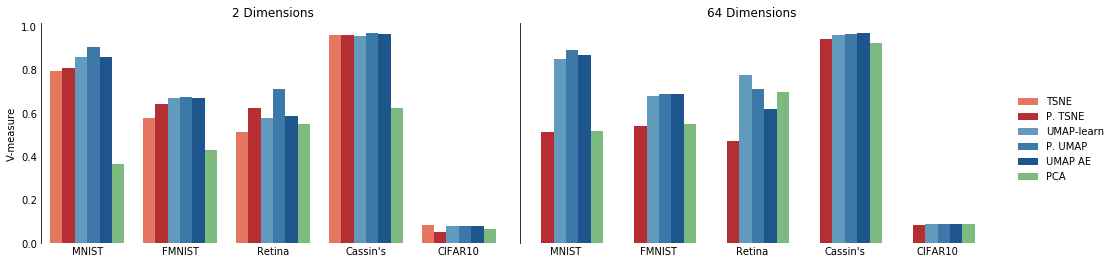

In [16]:
fg = sns.catplot(
    x="dataset",
    y="v_measure",
    hue="class_",
    hue_order=["TSNE", "parametric-tsne", "umap-learn",  "network", "autoencoder", "PCA"],
    order = ['mnist', 'fmnist', 'macosko2015', 'cassins_dtw', 'cifar10'],
    col="dim",
    height=4, 
    aspect=1.75,
    data=metrics_max_df,
    kind="bar",
    palette=palette,
    #legend=False
)
(fg.despine(bottom=True)
 .set_xticklabels(['MNIST', 'FMNIST', 'Retina', 'Cassin\'s', 'CIFAR10'])
 .set_axis_labels("", "V-measure")
)
ax = fg.axes[0][0]
ax.tick_params(axis=u'both', which=u'both',length=0)
fg._legend._legend_title_box._text.set_text("")
#fg._legend.texts[2].set_text("P. UMAP")
#fg._legend.texts[3].set_text("UMAP AE")
ax.set_title('2 Dimensions')
if len(fg.axes[0])>1:
    ax = fg.axes[0][1]
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.set_title('64 Dimensions')


fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'umap-learn'))[0][0]].set_text('UMAP-learn')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'network'))[0][0]].set_text('P. UMAP')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'autoencoder'))[0][0]].set_text('UMAP AE')
fg._legend.texts[np.where((np.array([i._text for i in fg._legend.texts]) == 'parametric-tsne'))[0][0]].set_text('P. TSNE')

#save_fig(FIGURE_DIR/'silhouette-test', save_pdf=True, dpi=300)